# Image Sentiment analysis
### building  CNN model to classify images to happy or sad 

# 1. Installing required packages 

In [1]:
#checking what packages are already installed
!pip list

zsh:1: /Users/premiram/Desktop/SIde_projects/Image_classification_sentiment/imageclassification/bin/pip: bad interpreter: /Users/premiram/side_projects/Image_classification/imageclassification/bin/python3: no such file or directory
Package                       Version
----------------------------- ------------
absl-py                       2.1.0
aiobotocore                   2.7.0
aiofiles                      22.1.0
aiohttp                       3.9.0
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.3
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-cloud-auth           0.1.4
anaconda-navigator            2.5.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.

In [2]:
#installing required packages 
%pip install tensorflow opencv-python matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
#recheck if packages installed correctly 
!pip list

zsh:1: /Users/premiram/Desktop/SIde_projects/Image_classification_sentiment/imageclassification/bin/pip: bad interpreter: /Users/premiram/side_projects/Image_classification/imageclassification/bin/python3: no such file or directory
Package                       Version
----------------------------- ------------
absl-py                       2.1.0
aiobotocore                   2.7.0
aiofiles                      22.1.0
aiohttp                       3.9.0
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.3
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-cloud-auth           0.1.4
anaconda-navigator            2.5.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.

In [4]:
import tensorflow as tf
import os

In [5]:
os.path.join('data','happy')

'data/happy'

In [6]:
os.listdir('data')

['sad_people', 'happy_people']

# 2. Remove dodgy images 

In [7]:
import cv2
import imghdr
from matplotlib import pyplot as plt 

/var/folders/9l/3_jp_m197nq8srgcv2_xvpq40000gn/T/ipykernel_35076/851803758.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
data_dir = 'data'

In [9]:
#runs through the list of the happy_people images  - to be used later when looping to remove 
#images of diff types
#manually remove images of data size smaller than 9KB
os.listdir(os.path.join(data_dir,'happy_people'))

['05-12-21-happy-people.jpg',
 'Happy.jpg',
 'Overtly-Cheerful-Primer-Editorials-min.png',
 '7-principles-of-successful-and-happy-people.png',
 '170404-happy-workers-feature.jpg',
 'image18.jpeg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 'o-HAPPY-facebook.jpg',
 'portrait-smiling-young-friends-walking-260nw-1392193913.jpg',
 'image14.jpeg',
 'how-to-be-happy-secrets-of-happiness-singapore-womens-weekly-6.jpg',
 'image15.jpeg',
 'maxresdefault2.jpg',
 'file-20230208-27-3jttof.jpg',
 'habits-of-happy-people-jpg.jpg',
 'friends_190412.jpg',
 'image19.jpeg',
 'compassion.jpg',
 'getty_107808334_121413.jpg',
 '1920px-face-smile.svg_.png',
 'es_27x40_pre_final_en-us_cps_custom-3e4a47095475f6fd5a6da815e62e326879a0bd2c.jpg',
 'freedom-serenity-concept-female-model-ecstatic-enjoyment-mixed-race-34800382.jpg',
 'friends-happy-190821-1490x838.jpg',
 'iblp-members-montage-shiny-happy-people.jpg',
 'image28.jpeg',
 'business-people-succesful-celebrating-group-succ

In [10]:
image_exts = ['jpeg','jpg','bmp','png']

In [11]:
image_exts[0]

'jpeg'

In [12]:
img = cv2.imread(os.path.join('data','happy_people','Happy.jpg'))

In [13]:
img.shape

(388, 800, 3)

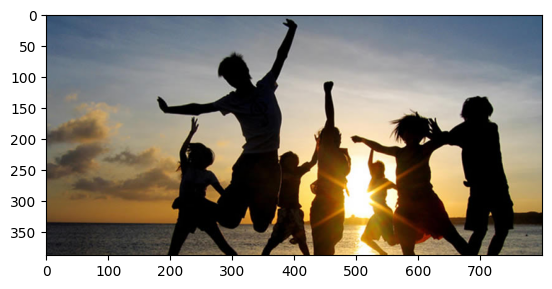

In [14]:
#shows a diff color scale
#plt.imshow(cv2.cvtColor(img,cv2)
#to convert to the correct color scale
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
# Remove .DS_Store files first
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file == '.DS_Store':
            os.remove(os.path.join(root, file))

In [16]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)   
        except Exception as e:
            print('Issue with image {}'.format(image_path))
                      

# 3. Load Data

In [17]:
#loading data using Keras Utils
#tf.data.Dataset??

In [18]:
import numpy as np
from matplotlib import pyplot as plt

In [19]:
#preprocessing of images and creates a directory
data = tf.keras.utils.image_dataset_from_directory('data')

Found 185 files belonging to 2 classes.


In [20]:
data_iterator = data.as_numpy_iterator()

In [21]:
batch = data_iterator.next()

In [22]:
# image references(arrays) and labels
len(batch)

2

In [23]:
#image represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [24]:
#image labels
#class 1 = sad people 
#class 0 = happy people
batch[1]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int32)

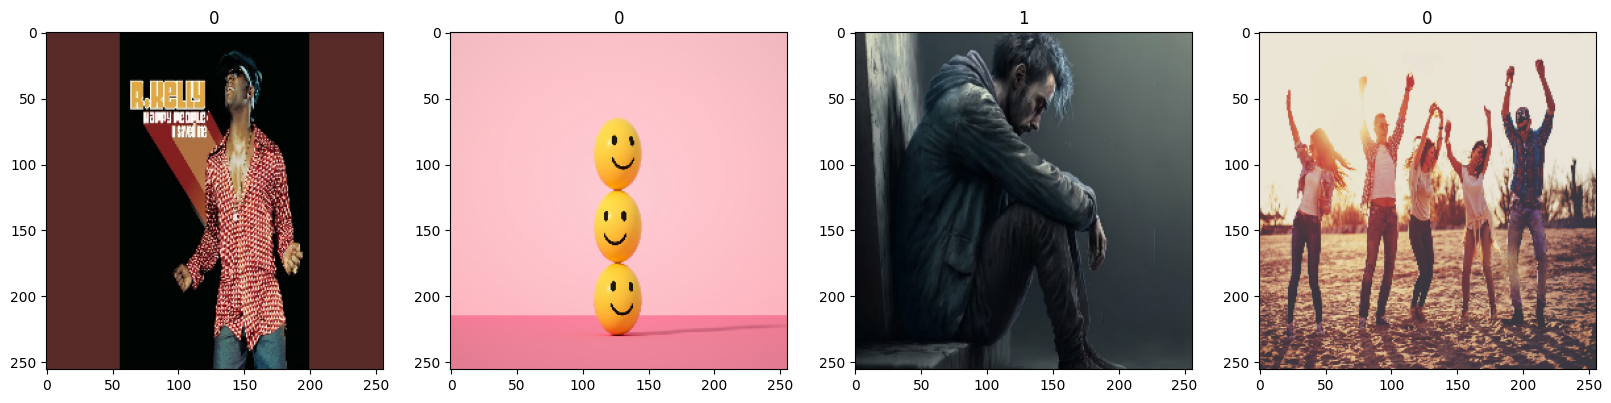

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Preprocess data

In [26]:
#scale data
data = data.map(lambda x,y: (x/255, y))

In [27]:
scaled_iterator = data.as_numpy_iterator()

In [28]:
batch = scaled_iterator.next()

In [29]:
batch[0].max()

1.0

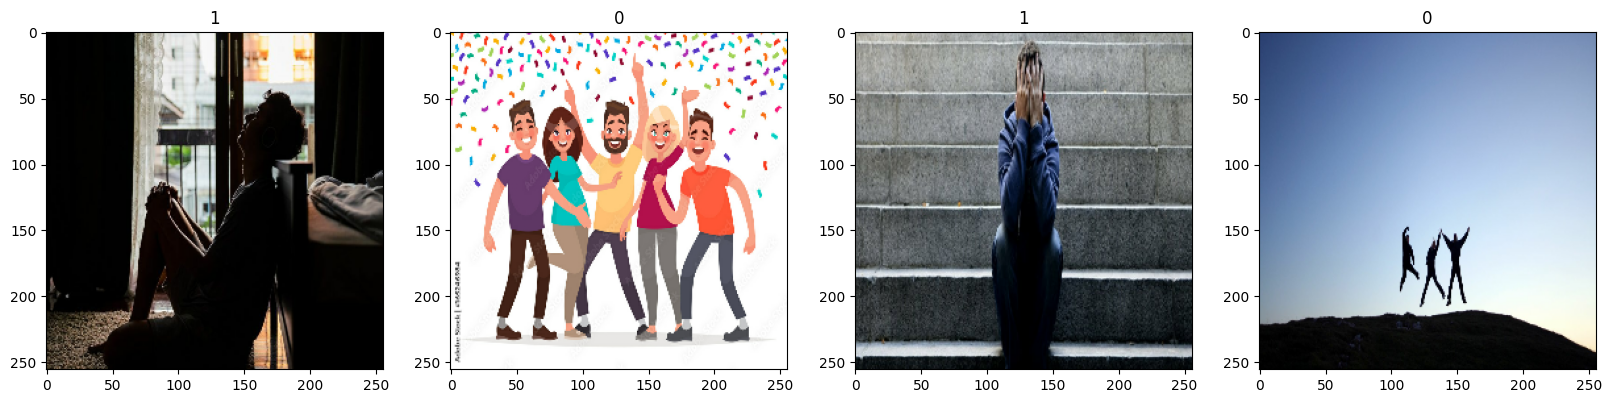

In [30]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [31]:
#splitting data
len(data)

6

In [32]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size= int(len(data)*.1)+1

In [33]:
train_size+val_size+test_size

6

In [34]:
train = data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [35]:
len(train)

4

# 5.Deep Model

In [36]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout # type: ignore


In [37]:
model = Sequential()

In [38]:
model.add(Conv2D(16,(3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
                 

/Users/premiram/Desktop/SIde_projects/Image_classification_sentiment/imageclassification/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 6. Train

In [41]:
logdir= 'logs'

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 502ms/step - accuracy: 0.3396 - loss: 1.5994 - val_accuracy: 0.4062 - val_loss: 0.8488
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 455ms/step - accuracy: 0.4146 - loss: 0.7979 - val_accuracy: 0.7188 - val_loss: 0.6803
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 442ms/step - accuracy: 0.5656 - loss: 0.6805 - val_accuracy: 0.4375 - val_loss: 0.6958
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 429ms/step - accuracy: 0.5312 - loss: 0.6653 - val_accuracy: 0.5312 - val_loss: 0.6663
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 427ms/step - accuracy: 0.4927 - loss: 0.6591 - val_accuracy: 0.5625 - val_loss: 0.6456
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 441ms/step - accuracy: 0.6698 - loss: 0.6231 - val_accuracy: 0.6250 - val_loss: 0.5721
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 460ms/step - accuracy: 0.7042 - loss: 0.5473 - val_accuracy: 0.7188 - val_loss: 0.4935
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 478ms/step - accuracy: 0.7635 - loss: 0.5159 - val_accuracy: 0.6875 - val_loss:

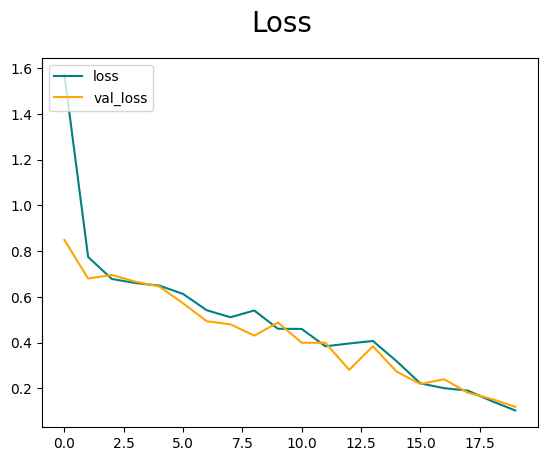

In [44]:
#plotting performance
fig= plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

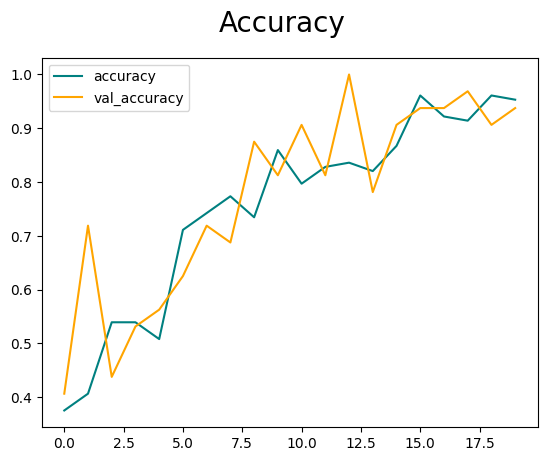

In [45]:
fig= plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 7. Evaluate Performance

In [46]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy # type: ignore

In [47]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [48]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


2024-06-27 23:55:29.410712: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [49]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9230769276618958, Recall:1.0, Accuracy:0.9599999785423279


# 8.Test

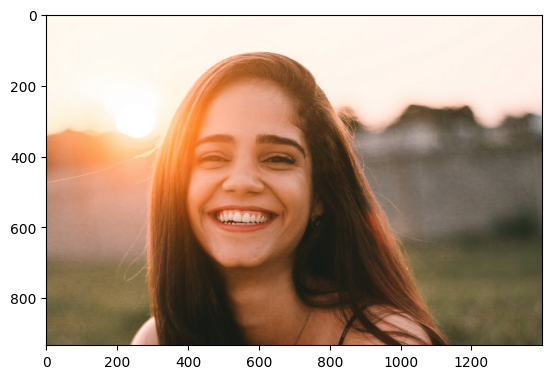

In [50]:
img=cv2.imread('happytest.png')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

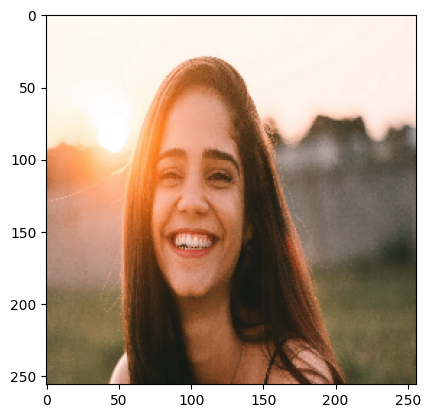

In [51]:
resize = tf.image.resize(cv2.cvtColor(img,cv2.COLOR_BGR2RGB), (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show

In [52]:
yhat = model.predict(np.expand_dims(resize/255,0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [53]:
yhat

array([[0.07802437]], dtype=float32)

In [54]:
if yhat > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is happy


# 9. Saving the model

In [55]:
from tensorflow.keras.models import load_model # type: ignore

In [56]:
model.save(os.path.join('models','happysadmodel.h5'))

In [57]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [58]:
new_model

<Sequential name=sequential, built=True>

In [59]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [60]:
if yhatnew > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is happy
